In [50]:
import pandas as pd
import random
import re
import numpy as np
import operator
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle
from collections import Counter, defaultdict

In [51]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [52]:
data = pd.read_csv('data/NEW_processed_data.csv')

In [55]:
data = data[data['flair'].notna()]

In [57]:
flairs = np.unique(data.flair)

In [58]:
flairs

array(['AskIndia', 'Business/Finance', 'CAA-NRC', 'CAA-NRC-NPR',
       'Coronavirus', 'Demonetization', 'Food', 'KRKFan', 'Non-Political',
       'Official Sadness Thread', 'Old', 'Original Comics', 'Photography',
       'Policy & Economy', 'Policy/Economy',
       'Policy/Economy -2017 Article ', 'Politics',
       'Politics -- Source in comments', 'Politics [Megathread]',
       'Scheduled', 'Science/Technology', 'Sports', 'Totally real',
       'Unverified', 'Zoke Tyme', '[R]eddiquette'], dtype=object)

In [59]:
data.head()

,flair,title,score,id,url,comms_num,created,body,author,comments,authors,feature_combine
0,Politics -- Source in comments,mumbai students protesting caa nrc wankhede st...,1395,eok4qb,https://i.redd.it/y4jcbkiedqa41.jpg,116.0,1.579031e+09,NaN,Gavthi_Batman,found myfitnesspal pretty good indian food pac...,I found MyFitnessPal to be pretty good with I...,mumbai students protesting caa nrc wankhede st...
1,Politics -- Source in comments,amit shah looking source comment,18,fbx2it,https://i.redd.it/6heuj8xxf3k41.png,4.0,1.583112e+09,NaN,sickcooler,found myfitnesspal pretty good indian food pac...,I found MyFitnessPal to be pretty good with I...,amit shah looking source comment found myfitne...
2,Politics -- Source in comments,annual reminder indias ayush minister promised...,395,fu1ly8,https://www.reddit.com/r/india/comments/fu1ly8...,43.0,1.585917e+09,spoiler dont please note said prevention cure ...,madamplease,found myfitnesspal pretty good indian food pac...,I found MyFitnessPal to be pretty good with I...,annual reminder indias ayush minister promised...
3,Politics -- Source in comments,mp covid19 megathread,18,fpt2jw,https://www.reddit.com/r/india/comments/fpt2jw...,19.0,1.585325e+09,thread sharing coronavirus news updates relate...,maardon_bhenji,found myfitnesspal pretty good indian food pac...,I found MyFitnessPal to be pretty good with I...,mp covid19 megathread found myfitnesspal prett...
4,Politics -- Source in comments,friends decades fallen fake news actively demo...,28,fvyodb,https://www.reddit.com/r/india/comments/fvyodb...,6.0,1.586208e+09,govt india failed miserably protecting doctors...,in3po,found myfitnesspal pretty good indian food pac...,I found MyFitnessPal to be pretty good with I...,friends decades fallen fake news actively demo...


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2076
Data columns (total 12 columns):
flair              2074 non-null object
title              2074 non-null object
score              2074 non-null object
id                 2073 non-null object
url                2073 non-null object
comms_num          2073 non-null float64
created            2073 non-null float64
body               1202 non-null object
author             2072 non-null object
comments           2072 non-null object
authors            2072 non-null object
feature_combine    2073 non-null object
dtypes: float64(2), object(10)
memory usage: 210.6+ KB


In [61]:
data.flair.value_counts()

Policy & Economy                  100
Food                              100
Policy/Economy                    100
Non-Political                     100
CAA-NRC                           100
AskIndia                          100
Photography                       100
Unverified                        100
Business/Finance                  100
Politics                          100
Sports                            100
Old                               100
Demonetization                    100
Politics -- Source in comments    100
CAA-NRC-NPR                       100
Policy/Economy -2017 Article      100
Science/Technology                100
Totally real                      100
Scheduled                         100
Coronavirus                       100
Original Comics                    26
Zoke Tyme                          23
[R]eddiquette                      18
Politics [Megathread]               5
KRKFan                              1
Official Sadness Thread             1
Name: flair,

In [62]:
data['feature_combine'].isna().any()

True

In [63]:
data['feature_combine'].isna().sum()

1

In [64]:
data_new = data[data['feature_combine'].notna()]

In [65]:
data_new['feature_combine'].isna().any()

False

In [96]:
data_new.to_csv("data/cleaned_data.csv")

In [97]:
#Using flairs from left posts

In [98]:
np.unique(data_new['flair'])

array(['AskIndia', 'Business/Finance', 'CAA-NRC', 'CAA-NRC-NPR',
       'Coronavirus', 'Demonetization', 'Food', 'Non-Political',
       'Official Sadness Thread', 'Old', 'Original Comics', 'Photography',
       'Policy & Economy', 'Policy/Economy',
       'Policy/Economy -2017 Article ', 'Politics',
       'Politics -- Source in comments', 'Politics [Megathread]',
       'Scheduled', 'Science/Technology', 'Sports', 'Totally real',
       'Unverified', 'Zoke Tyme', '[R]eddiquette'], dtype=object)

In [68]:
data_new['flair'].value_counts()

Policy & Economy                  100
Old                               100
Policy/Economy                    100
Non-Political                     100
CAA-NRC                           100
AskIndia                          100
Photography                       100
Unverified                        100
Business/Finance                  100
Politics                          100
Sports                            100
Food                              100
Politics -- Source in comments    100
CAA-NRC-NPR                       100
Policy/Economy -2017 Article      100
Science/Technology                100
Totally real                      100
Scheduled                         100
Coronavirus                       100
Demonetization                    100
Original Comics                    26
Zoke Tyme                          23
[R]eddiquette                      18
Politics [Megathread]               5
Official Sadness Thread             1
Name: flair, dtype: int64

In [69]:
n_posts_remove = 0
for ele in to_remove:
    n_posts_remove+=data['flair'].value_counts()[ele]

In [70]:
data_new['flair'].value_counts()

Policy & Economy                  100
Old                               100
Policy/Economy                    100
Non-Political                     100
CAA-NRC                           100
AskIndia                          100
Photography                       100
Unverified                        100
Business/Finance                  100
Politics                          100
Sports                            100
Food                              100
Politics -- Source in comments    100
CAA-NRC-NPR                       100
Policy/Economy -2017 Article      100
Science/Technology                100
Totally real                      100
Scheduled                         100
Coronavirus                       100
Demonetization                    100
Original Comics                    26
Zoke Tyme                          23
[R]eddiquette                      18
Politics [Megathread]               5
Official Sadness Thread             1
Name: flair, dtype: int64

In [71]:
data_new.groupby('flair').count()['title'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8, title='Number of posts in each flair', xTitle='Flairs')

In [72]:
#Observation: Number of samples of Policy/Economy and Politics is almost 
# half of the number of samples of Politics class

#Conclusion: Use weighted classifier

In [73]:
# Since the dataframe mainly contains text data, 
# checking correlation and presence of outliers does not help

In [74]:
##Checking top words used in content of posts for each flair class

In [75]:
ana = defaultdict()
excep = 0
for i in range(len(data_new)):
    #ana[data['flair'][i]].value
    try:
        fl = data_new['flair'][i]
        #print(fl)
        if fl in ana:
            s = ana[fl]
            #print(ana['CAA-NRC'])
            s1 = s + ' ' + data_new['feature_combine'][i]
            ana[fl] = s1
        else:
            ana[fl] = data_new['feature_combine'][i]
    except KeyError:
        #print('Key Error at ',i)
        excep+=1
        continue

In [76]:
excep

4

In [77]:
print('Expected excep = ', n_posts_remove)

Expected excep =  73


In [78]:
with open('ana','wb') as inf:
    pickle.dump(ana, inf)

In [79]:
flairs = np.unique(data_new.flair)

In [80]:
#data_new.to_csv("data/cleaned_data.csv", index=None)

/home/dexter/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



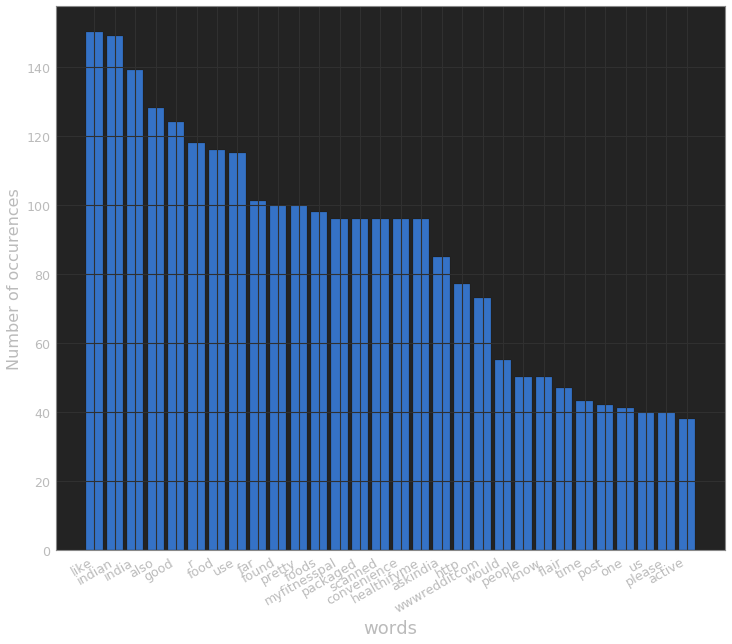

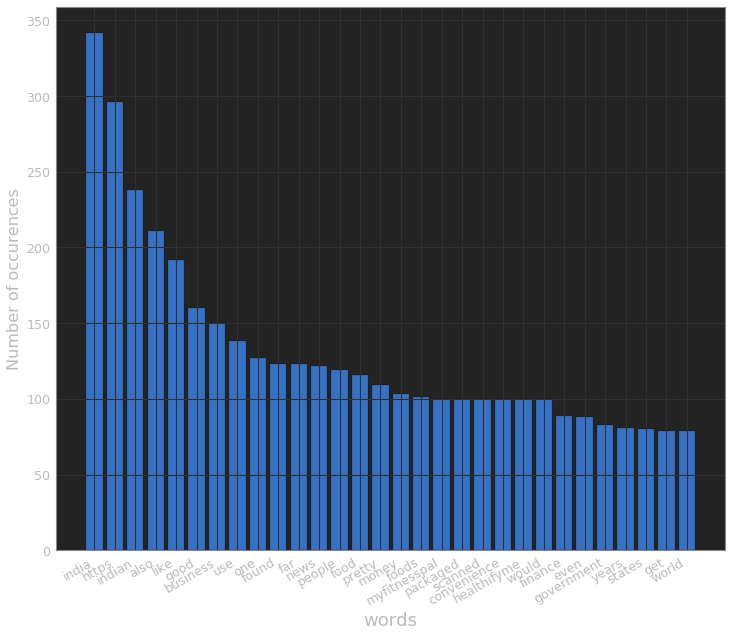

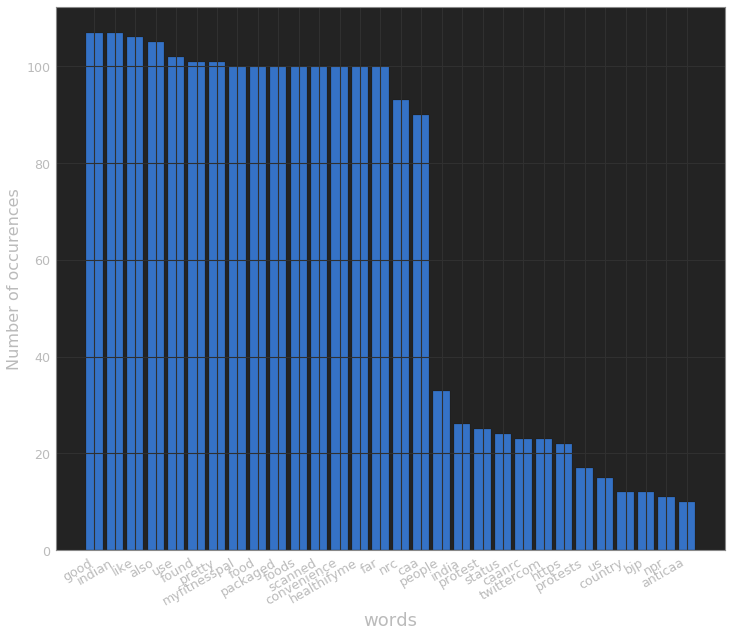

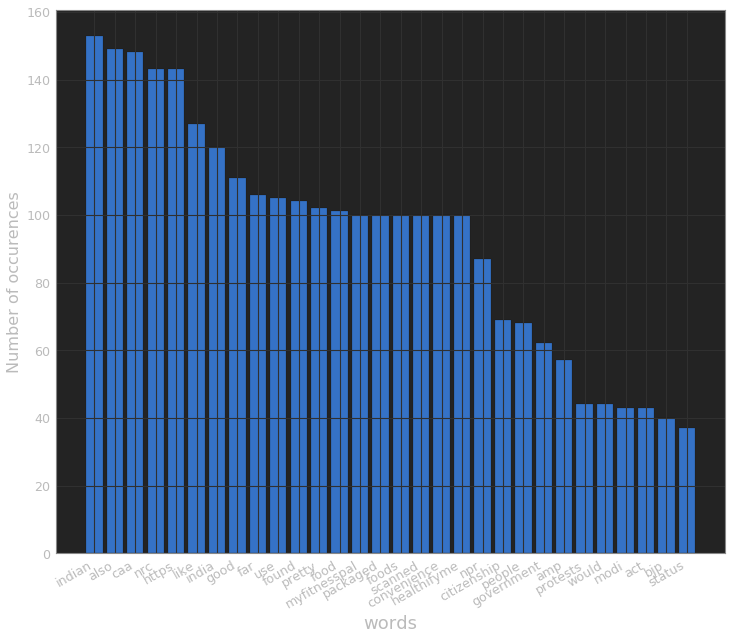

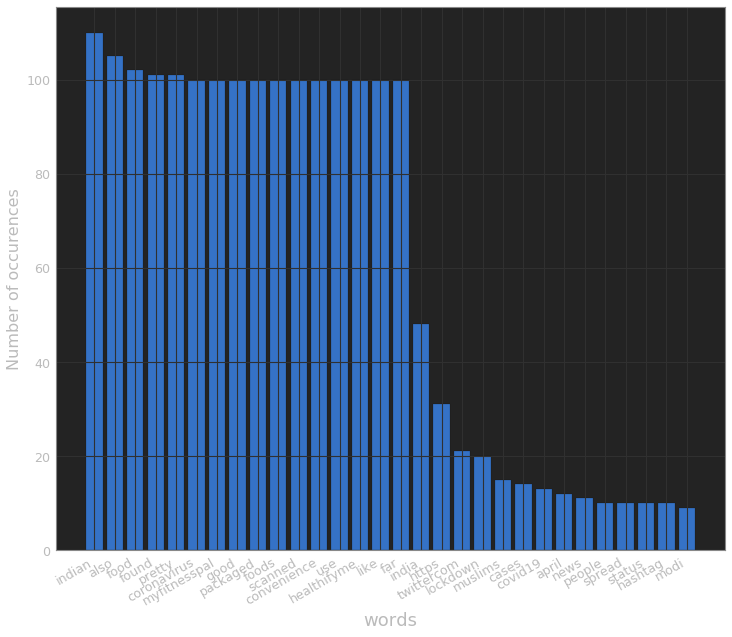

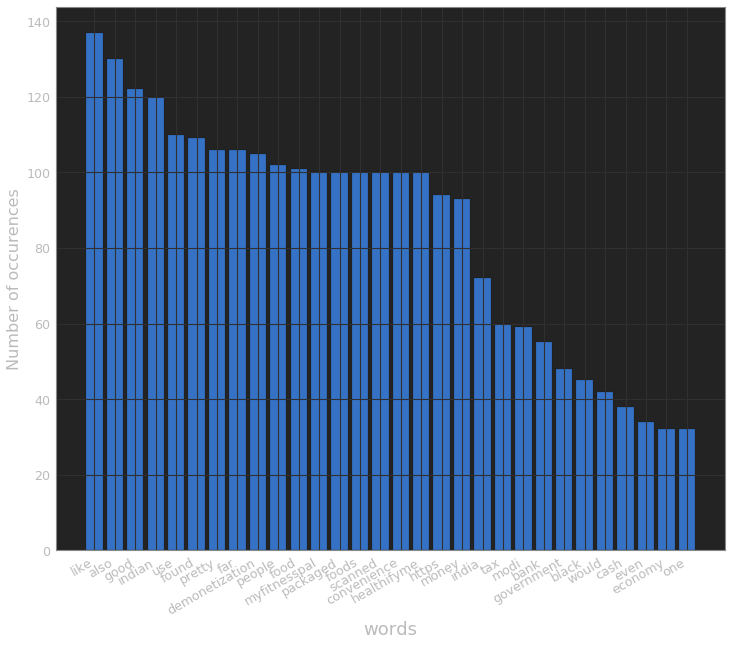

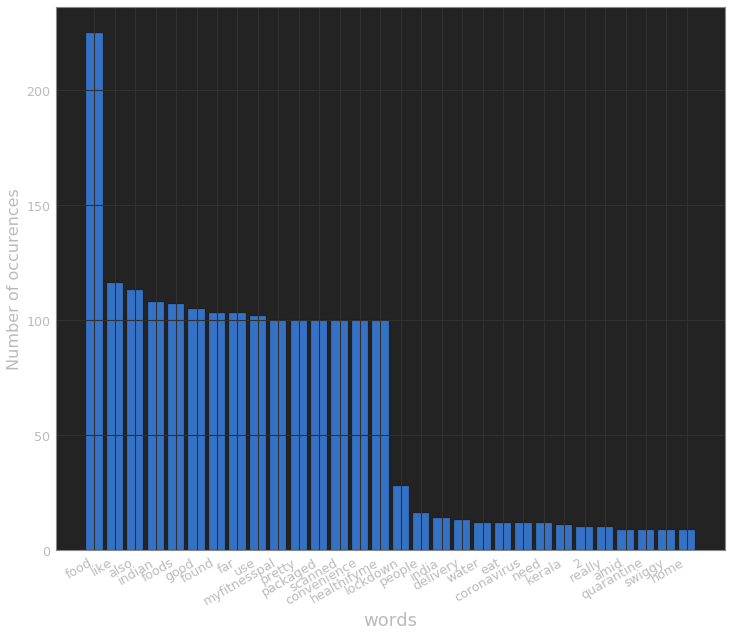

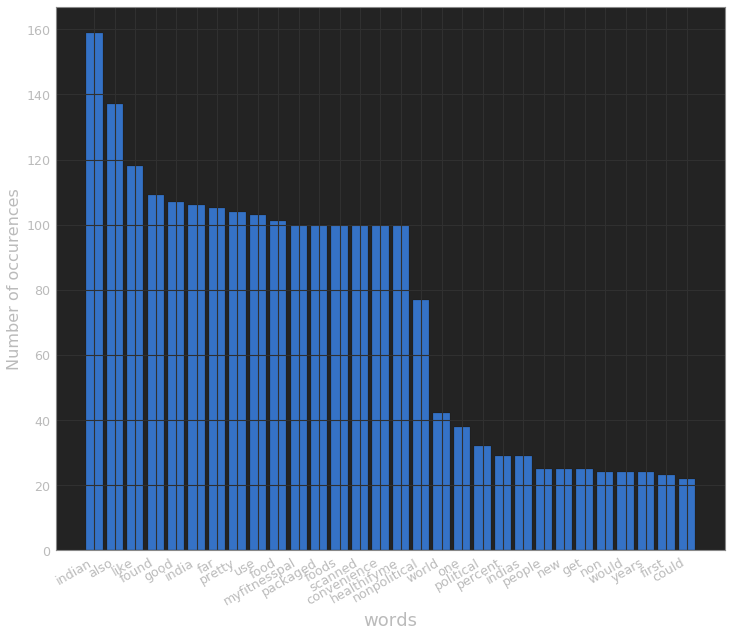

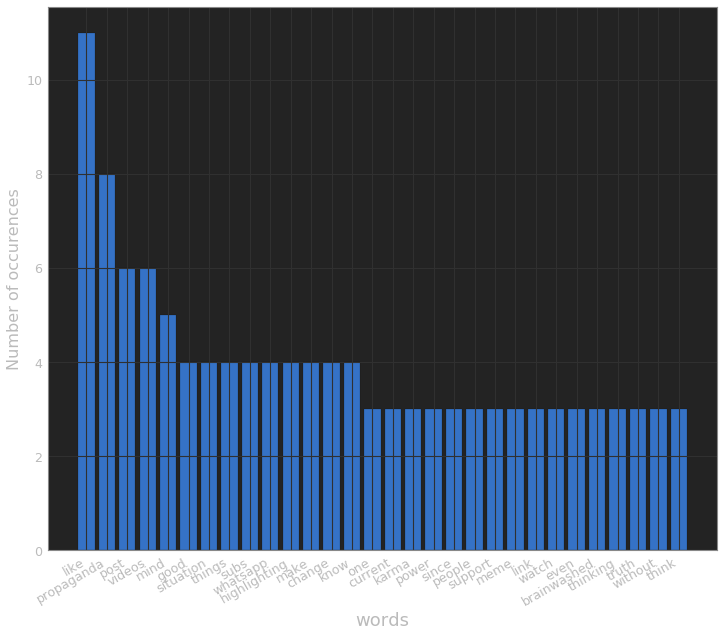

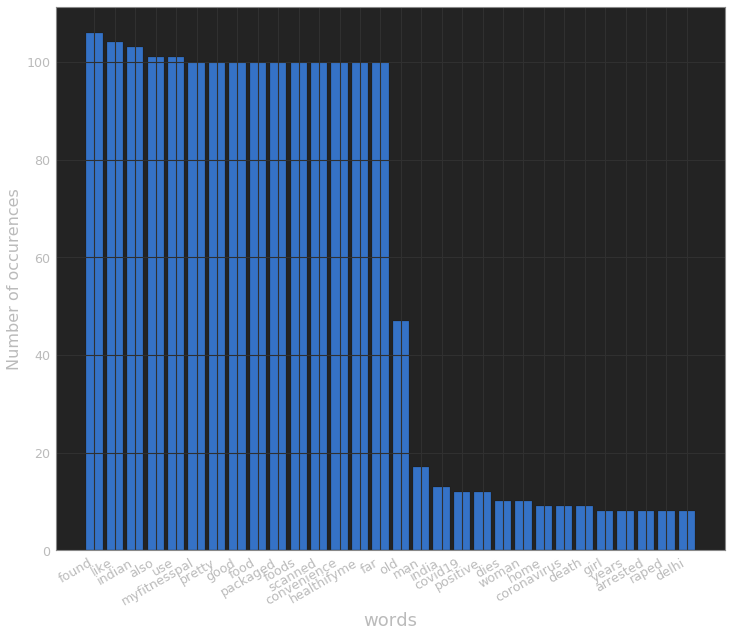

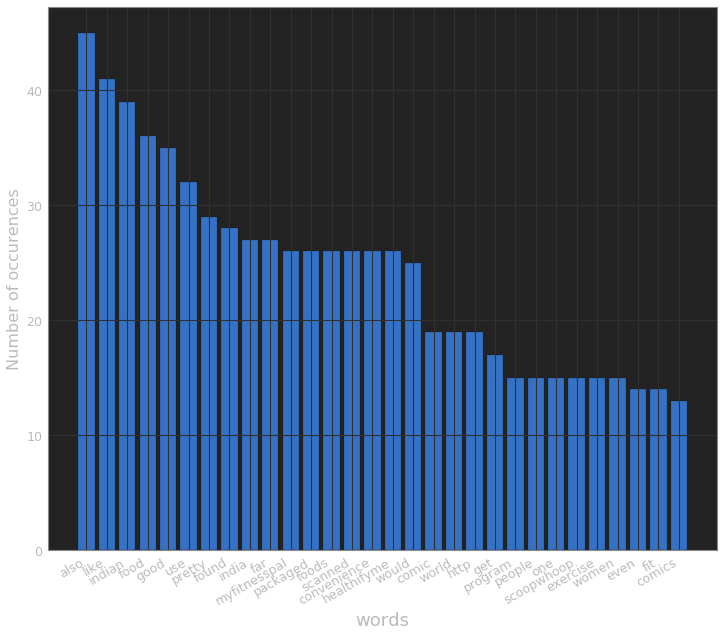

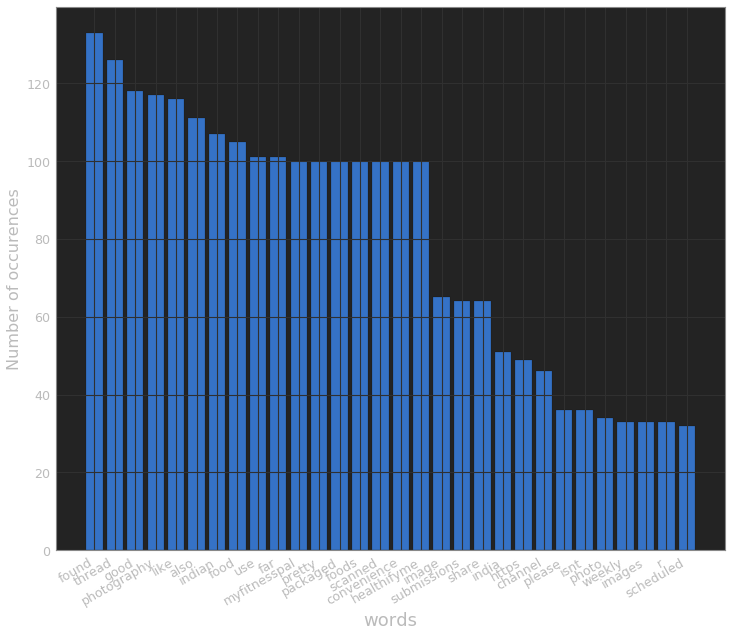

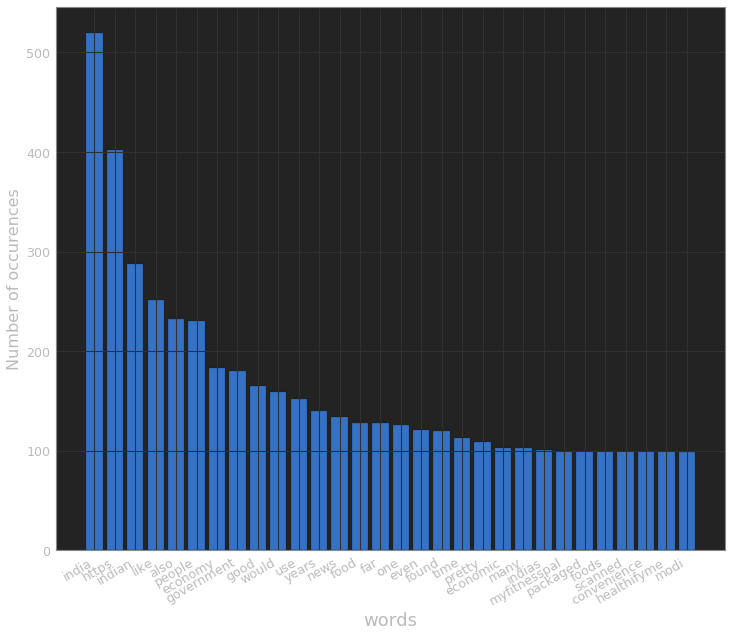

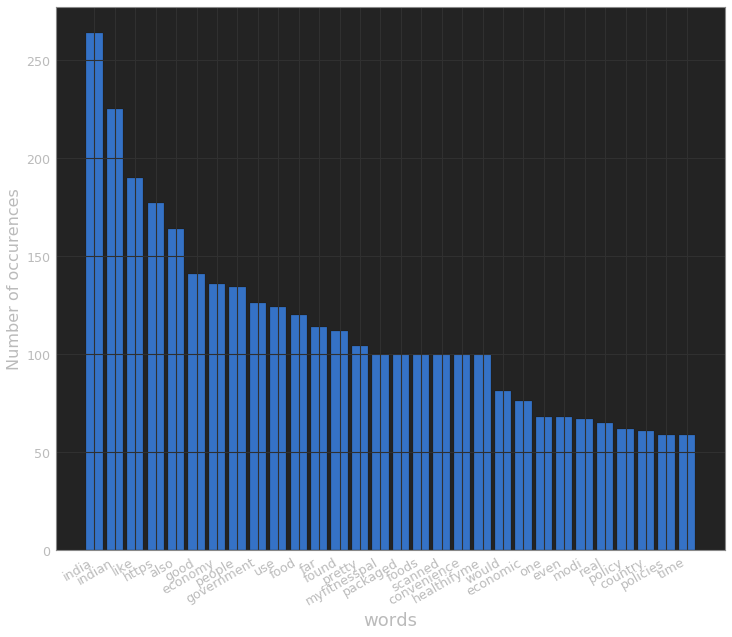

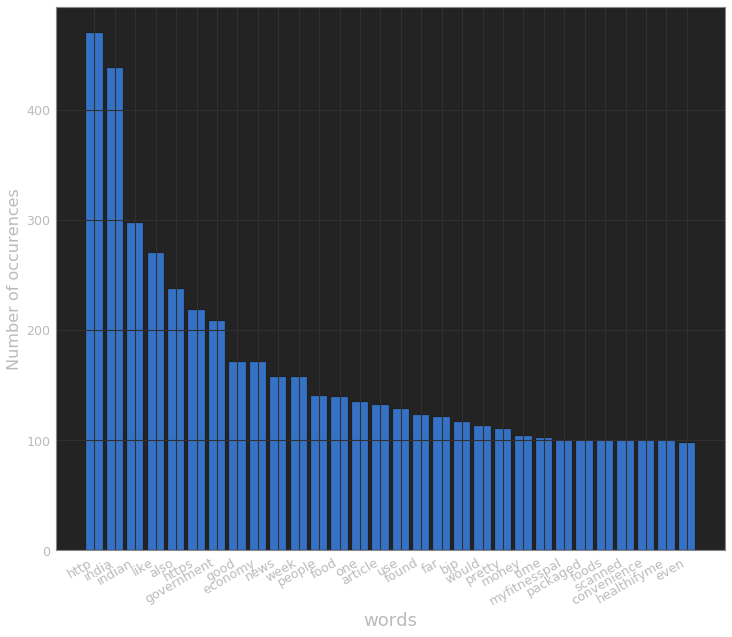

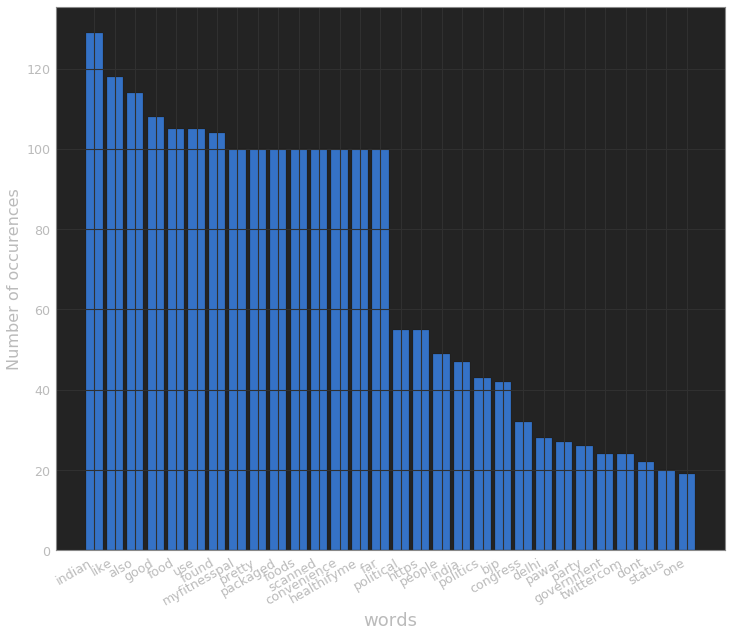

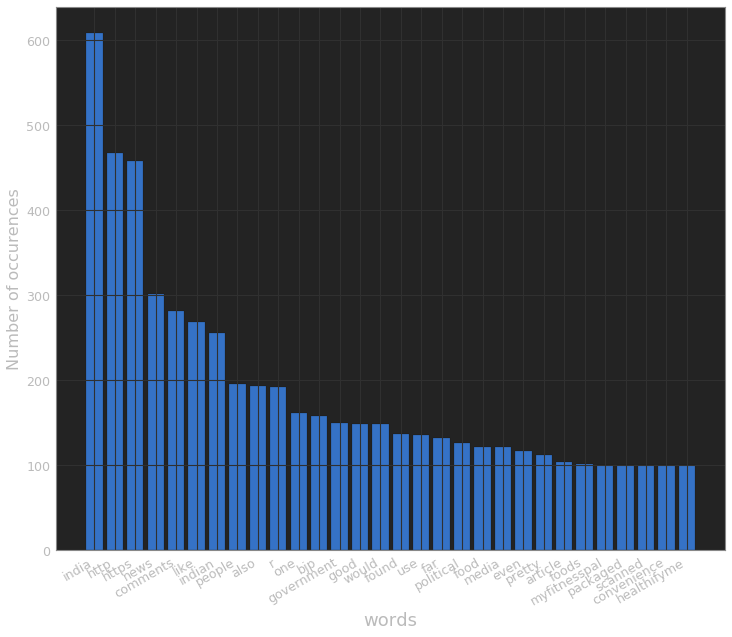

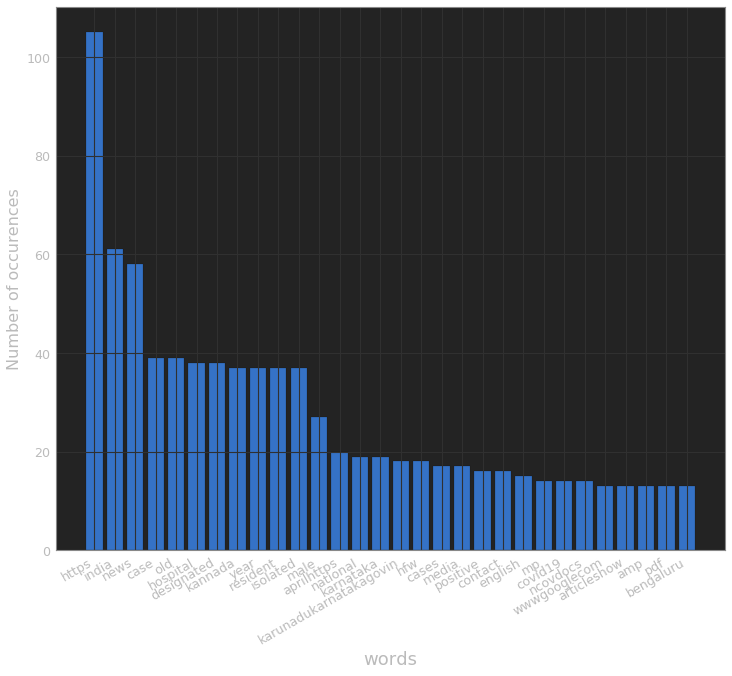

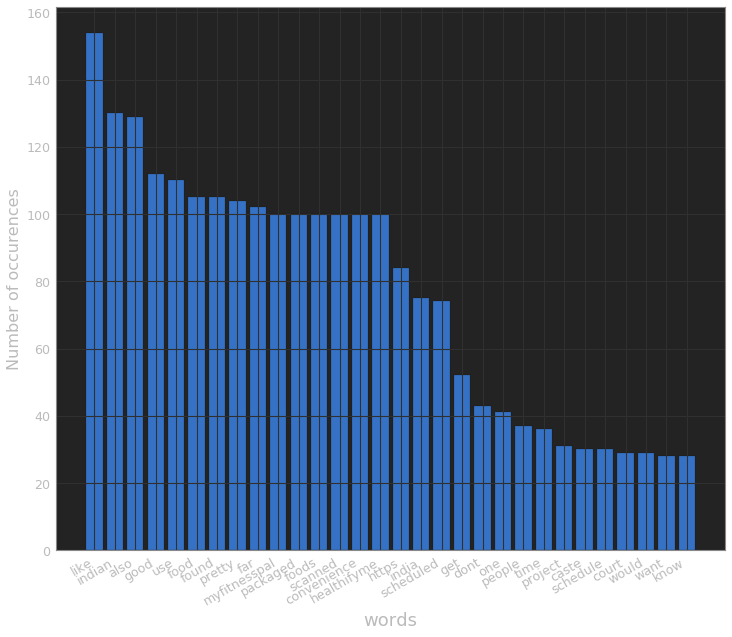

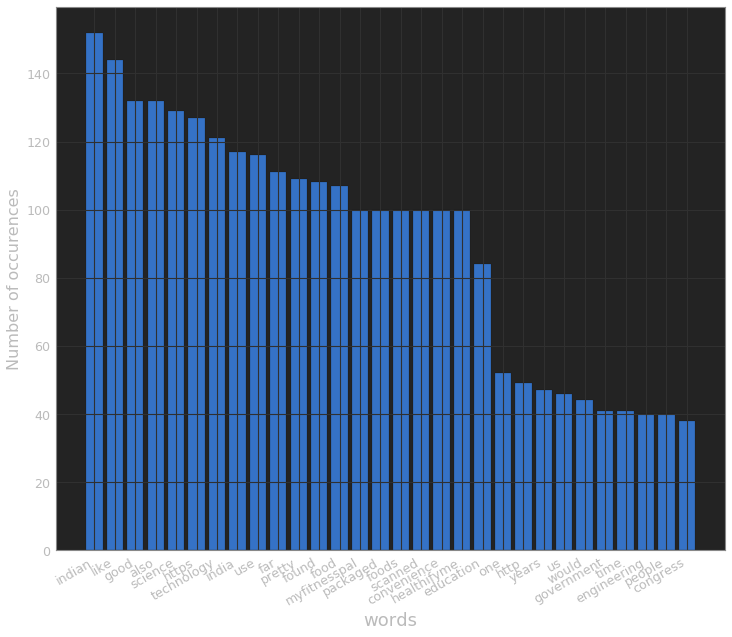

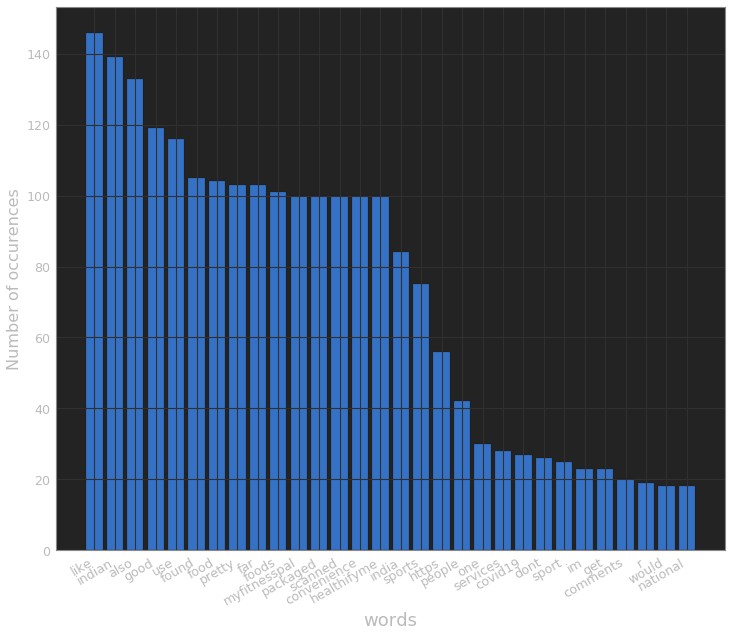

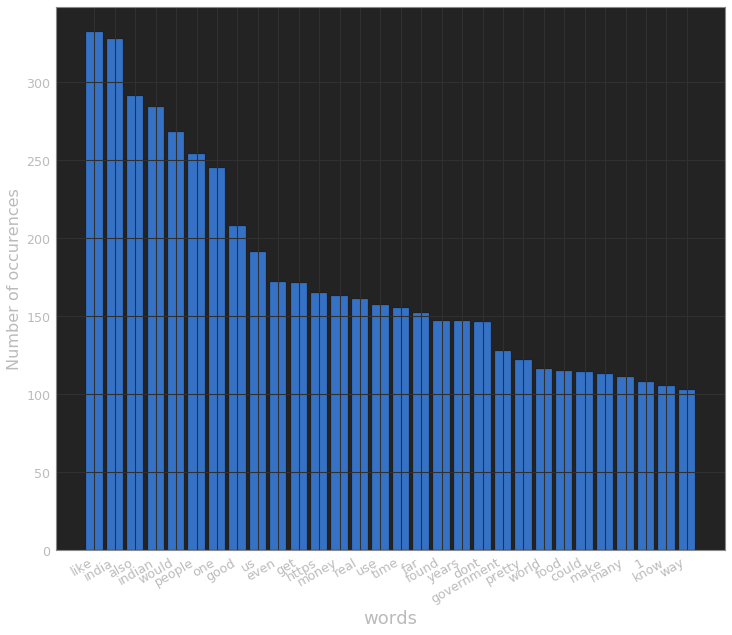

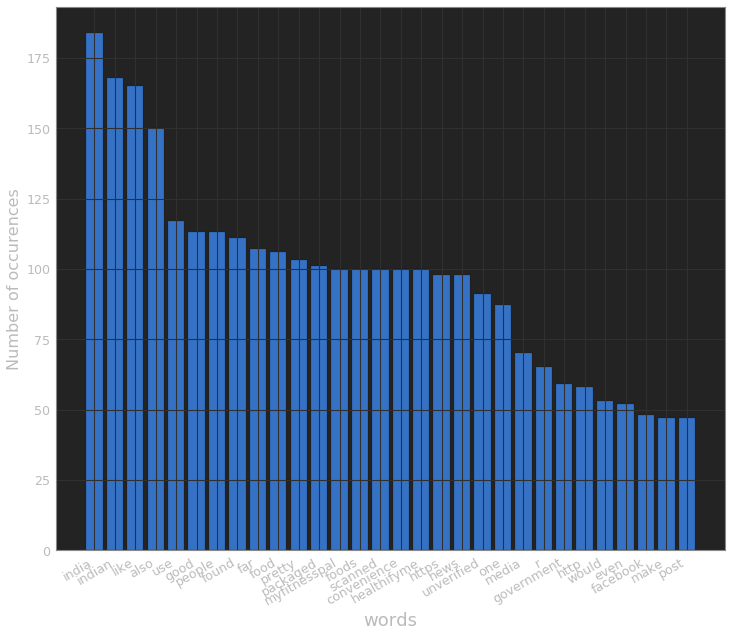

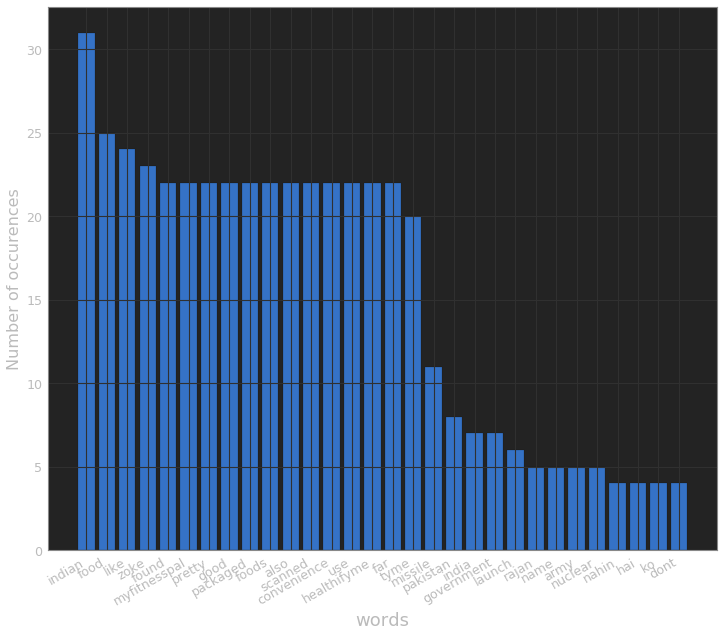

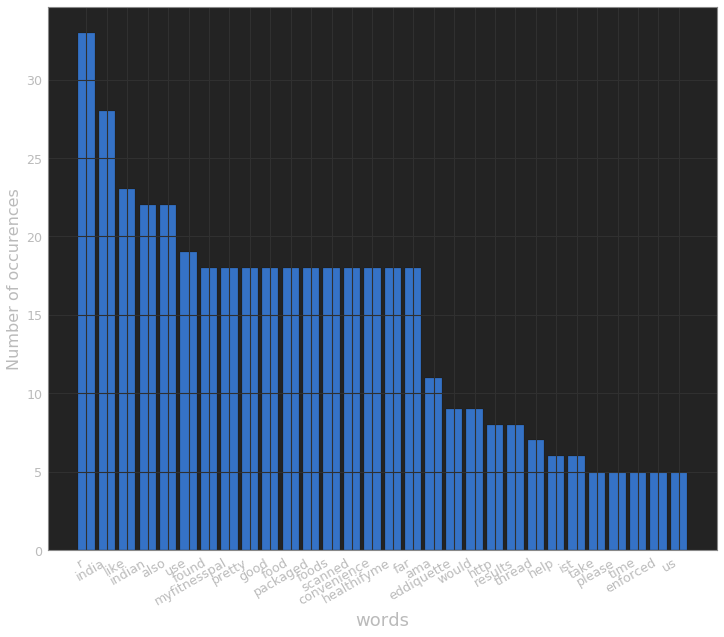

In [81]:
for i in flairs:
    plt.figure(figsize = [12,10])
    ax = plt.axes()
    #print(flairs)
    freqs = Counter(ana[i].split())
    f =sorted(freqs.items(), key = operator.itemgetter(1) ,reverse = True)
    ax.bar(dict(f[:30]).keys(), dict(f[:30]).values(), edgecolor='black')
    plt.xlabel('words', fontsize=18)
    plt.ylabel('Number of occurences', fontsize=16)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [82]:
##CHECKING NUMBER OF COMMENTS FOR EACH FLAIR

In [83]:
comms_num_freq = defaultdict()
excep = 0
for i in range(len(data_new)):
    #ana[data['flair'][i]].value
    try:
        fl = data_new['flair'][i]
        #print(fl)
        if fl in comms_num_freq:
            s = comms_num_freq[fl]
            #print(ana['CAA-NRC'])
            s1 = s + data_new['comms_num'][i]
            comms_num_freq[fl] = s1
        else:
            comms_num_freq[fl] = data_new['comms_num'][i]
    except KeyError:
        #print('Key Error at ',i)
        excep+=1
        continue

In [84]:
excep

4

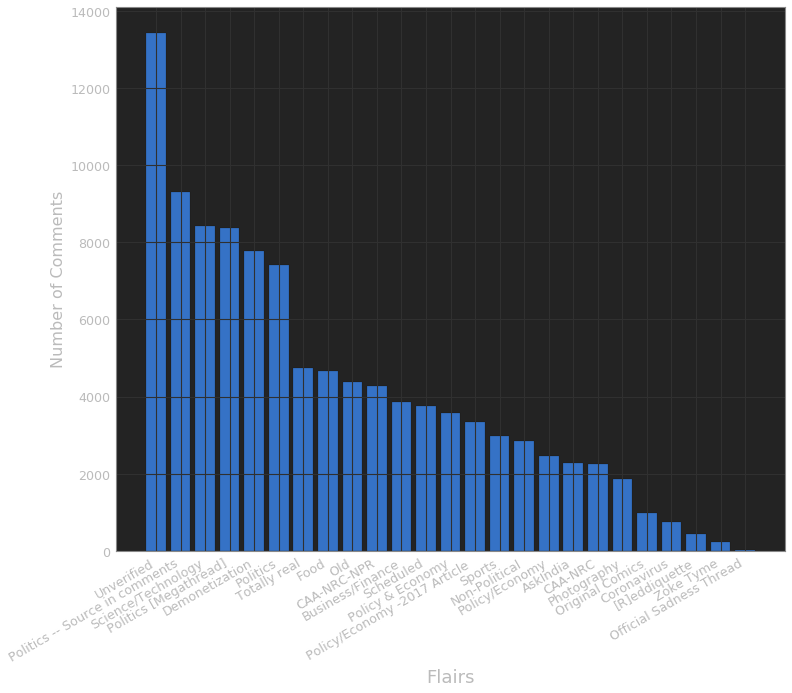

In [85]:
plt.figure(figsize = [12,10])
#print(flairs)
ax = plt.axes()
freqs = comms_num_freq
f =sorted(freqs.items(), key = operator.itemgetter(1) ,reverse = True)
ax.bar(dict(f[:30]).keys(), dict(f[:30]).values(), edgecolor='black')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.xlabel('Flairs', fontsize=18)
plt.ylabel('Number of Comments', fontsize=16)
plt.show()

In [86]:
##Checking common authors of posts for each flair
##Initial intuition was to detect author distribution across different flairs, but most posts are by unique authors and 
## there are not many intances of multiple posts by a single author. 
# So, instead of number of posts and flair of the posts by all authors, I checked the unique authors in each flair. 

In [87]:
authors = defaultdict()
excep = 0
for i in range(len(data_new)):
    try:
        fl = data_new['flair'][i]
        if fl in ana:
            s = ana[fl]
            #print(ana['CAA-NRC'])
            s1 = s + ' ' + data_new['feature_combine'][i]
            authors[fl] = s1
        else:
            authors[fl] = data_new['feature_combine'][i]
    except KeyError:
        #print('Key Error at ',i)
        excep+=1
        continue

In [88]:
data_new.groupby('flair').count()['author'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=1, title='Number of Authors in each flair', xTitle='Flairs')

In [89]:
data_new.groupby('flair').count()

,title,score,id,url,comms_num,created,body,author,comments,authors,feature_combine
flair,,,,,,,,,,,
AskIndia,100,100,100,100,100,100,100,100,100,100,100
Business/Finance,100,100,100,100,100,100,77,100,100,100,100
CAA-NRC,100,100,100,100,100,100,18,100,100,100,100
CAA-NRC-NPR,100,100,100,100,100,100,35,100,100,100,100
Coronavirus,100,100,100,100,100,100,10,100,100,100,100
Demonetization,100,100,100,100,100,100,49,100,100,100,100
Food,100,100,100,100,100,100,23,100,100,100,100
Non-Political,100,100,100,100,100,100,47,100,100,100,100
Official Sadness Thread,1,1,1,1,1,1,1,1,1,1,1


In [90]:
##Observation: all attributes have some null values except feature_combine

In [91]:
##Timestamp of posts

In [92]:
df = data_new
df['created'] = pd.to_datetime(df['created'])
df = df.set_index('created')
df['day'] = df.index.date
counts = df.groupby(['day', 'flair']).agg(len)
#counts = pd.DataFrame(counts, columns=['count'])

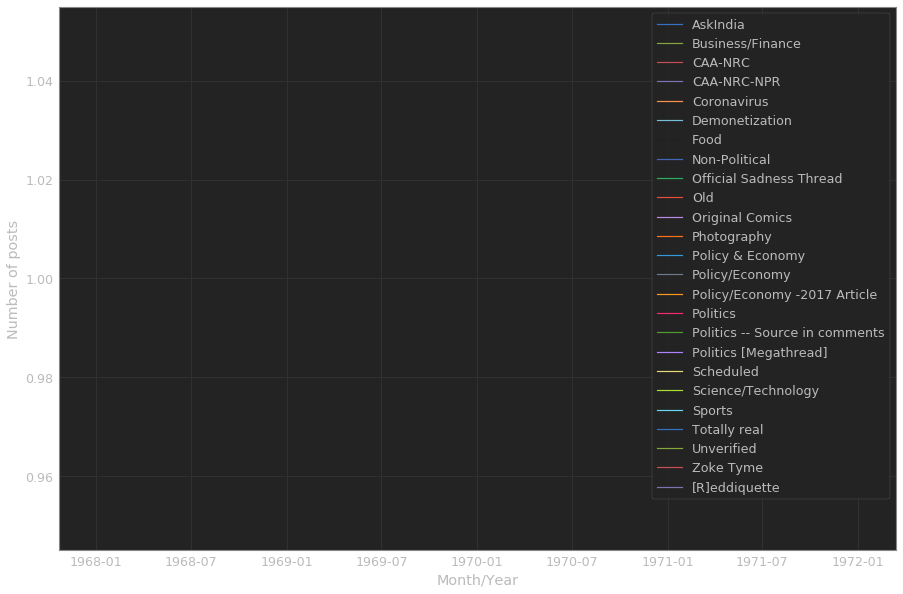

In [93]:
times = []
plt.figure(figsize=[15,10])
for f in flairs:
    l = defaultdict.fromkeys(['count', 'timestamp'])
    l['count'] = []
    c = 0
    l['timestamp'] = []
    #print(f)
    for i in range(len(counts)):
        j = counts.index[i]
        if j[1]==f:
            c+=1
            l['count'].append(c)
            l['timestamp'].append(j[0])
    plt.plot(l['timestamp'], l['count'], label = f)
plt.xlabel("Month/Year")
plt.ylabel("Number of posts")
plt.legend()
plt.show()

In [94]:
##Similar trends in many flairs. Using timestamp as a feature may not be very helpful